In [37]:
import pandas as pd

In [38]:
df = pd.read_csv("data/data.csv")
df.head()

,R1,R2,G1,G2,B1,B2,is_liked
0,104,90,117,111,62,36,0
1,177,52,16,22,113,2,1
2,86,59,250,122,128,124,0
3,68,73,138,47,47,245,0
4,177,25,226,22,196,210,1


In [41]:
df.columns

Index(['R1', 'R2', 'G1', 'G2', 'B1', 'B2', 'is_liked'], dtype='object')

In [36]:
# apply KNN and get the prediction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# split data into train and test
X = df[['R1', 'R2' , 'G1' , 'G2' , 'B1' , 'B2']]
y = df['is_liked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

# create model
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, y_train)

# get the prediction
y_pred = model.predict(X_test)
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


c:\Users\kdivy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7719298245614035

c:\Users\kdivy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\kdivy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

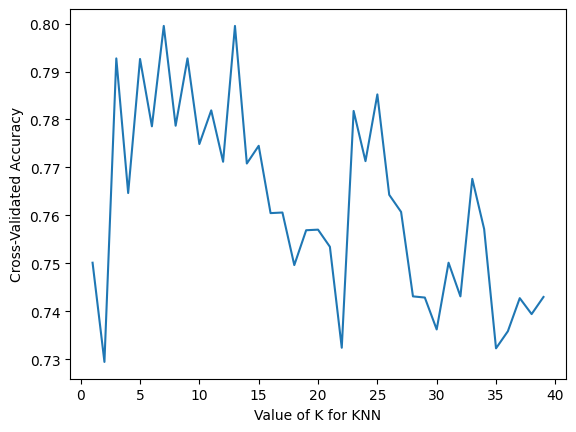

In [32]:
# find the optimal value of k
from sklearn.model_selection import cross_val_score
k_range = range(1, 40)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# plot the accuracy
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [69]:
# try all other model using library named 